## Введение в нейронные сети

https://proproprogs.ru/neural_network/struktura-i-princip-raboty-polnosvyaznyh-neyronnyh-setey

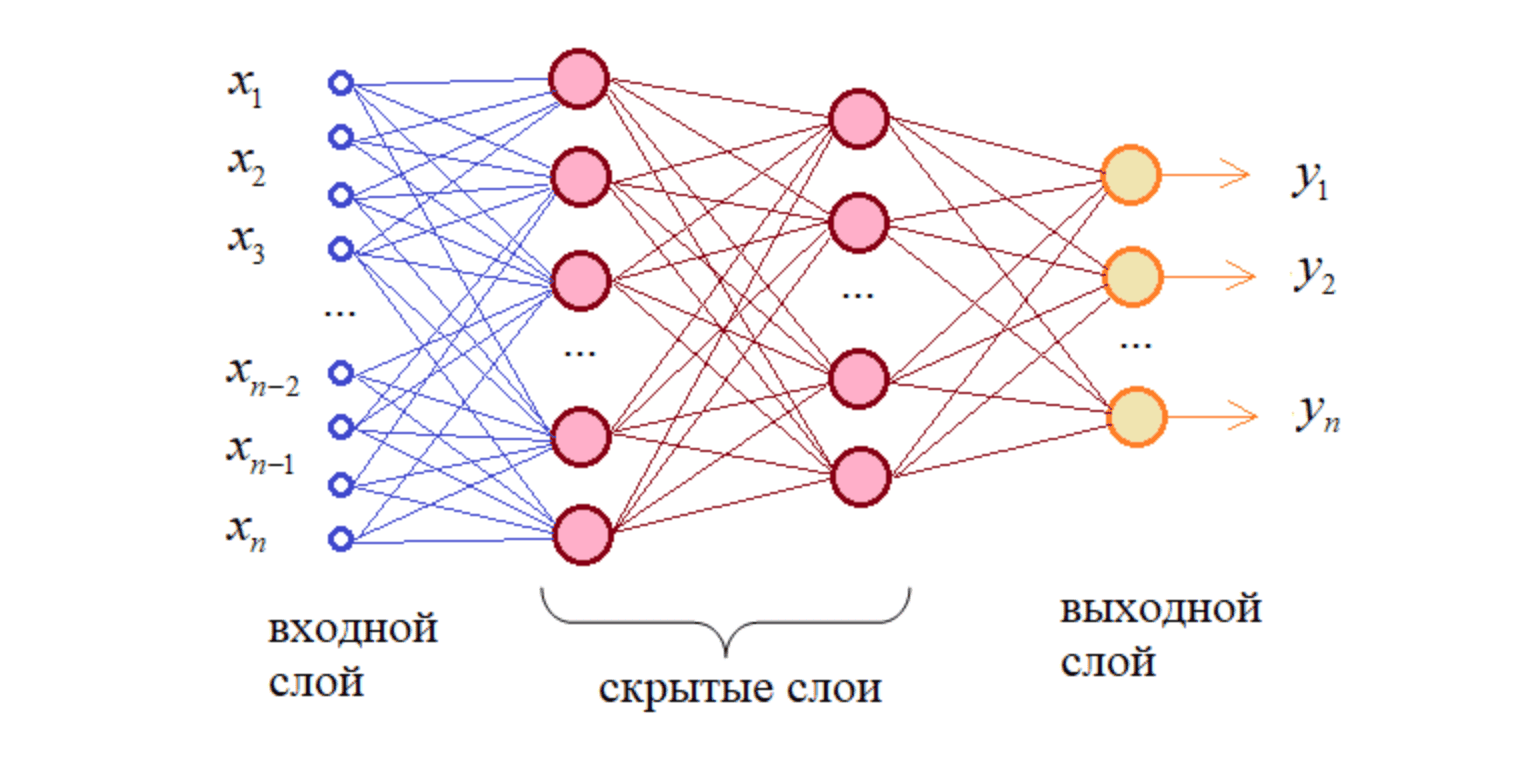

# Введение в нейронные сети

Простейшая нейронная сеть (НС) — персептрон — является упрощённым аналогом биологической сети, состоящей из нейронов, соединённых дендритами и аксонами. Персептрон представляет собой полносвязную сеть прямого распространения, где каждый нейрон предыдущего слоя связан с каждым нейроном следующего слоя, и сигнал распространяется от входного слоя к выходному без обратных связей.

Каждая связь между нейронами имеет определённый вес: \( w_{ij} \) — вес от j-го нейрона к i-му нейрону. Сигнал, проходя по этой связи, изменяется в соответствии с её весом. Нейрон представляет собой сумматор входных сигналов, пропуская сумму через функцию активации, которая и определяет выходное значение нейрона.

## Пример работы нейронной сети

Для лучшего понимания работы НС рассмотрим пример: девочка выбирает парня по трём параметрам:

1. **Наличие квартиры** (да — 1, нет — 0).
2. **Отношение к тяжёлому року** (да — 1, нет — 0).
3. **Насколько парень красив** (да — 1, нет — 0).

Девочка положительно относится к наличию квартиры и красоте, но отрицательно к тяжёлому року. Поэтому веса связей для квартиры и красоты положительные, а для рока отрицательные. На вход НС поступают сигналы в виде значений +1 или 0, которые умножаются на соответствующие веса и суммируются. Это значение проходит через функцию активации, формируя выходное значение нейрона.

### Пример:

Красивый парень с квартирой, любящий рок:
(0.5 * 1) + (-0.5 * 1) + (0.5⋅1) = 0.5.  

Красивый парень без квартиры, не любящий рок:
(0.5 * 0) + (-0.5 * 0) + (0.5⋅1) = 0.5

Если результат функции активации превышает пороговое значение, на выходе нейрона формируется сигнал "да".


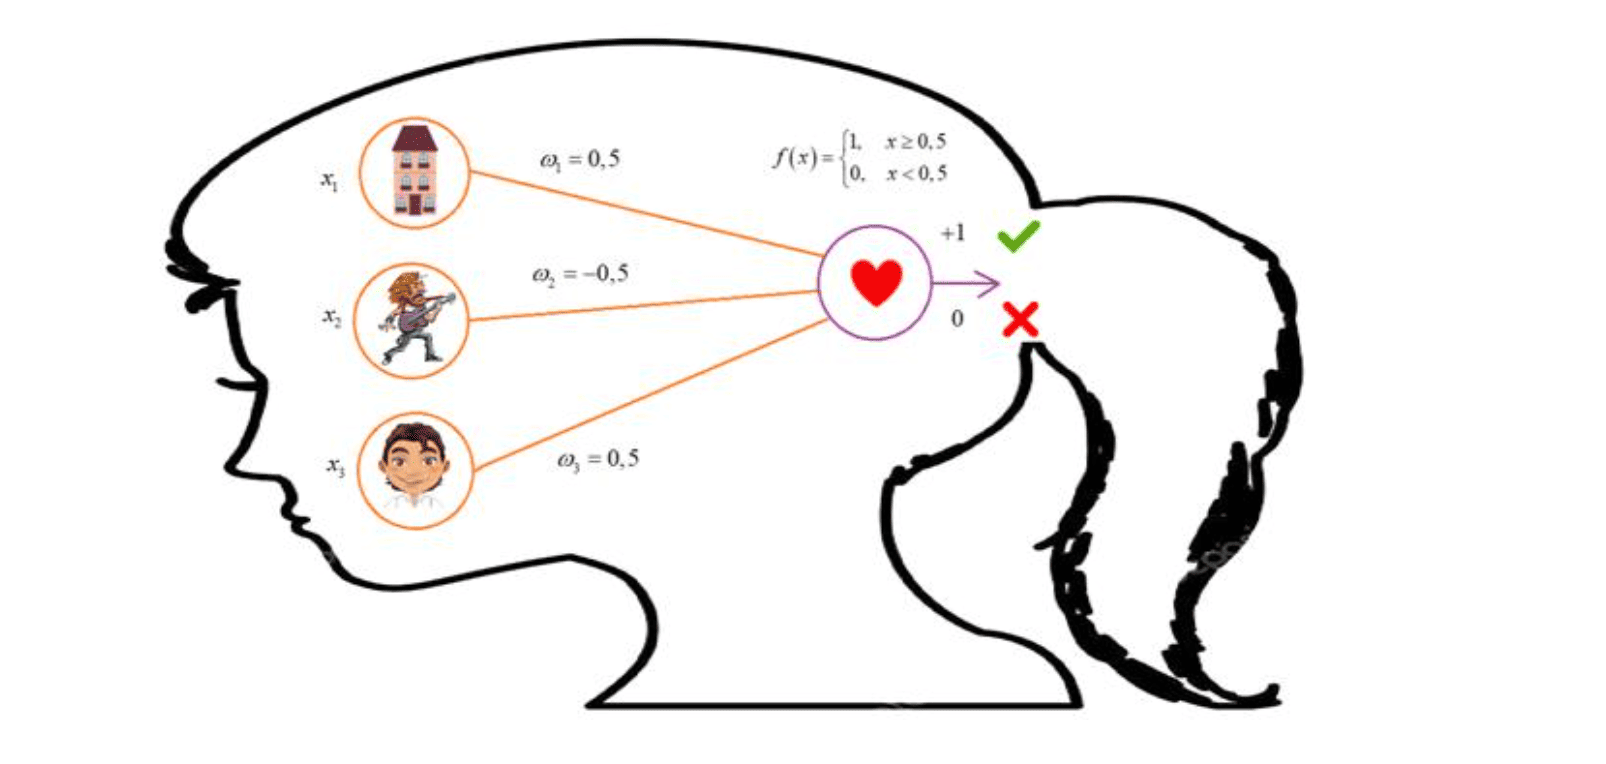

## Многослойные нейронные сети.   
Более сложные умозаключения позволяют делать нейронные сети с дополнительными слоями нейронов. В таких сетях скрытые слои активируются при определённых условиях, обобщая наблюдаемые факторы. Например, первый нейрон скрытого слоя активируется при наличии квартиры и любви к року, а второй — при встрече с красивым парнем. Результирующая симпатия формируется, если первое условие отсутствует, а второе присутствует.

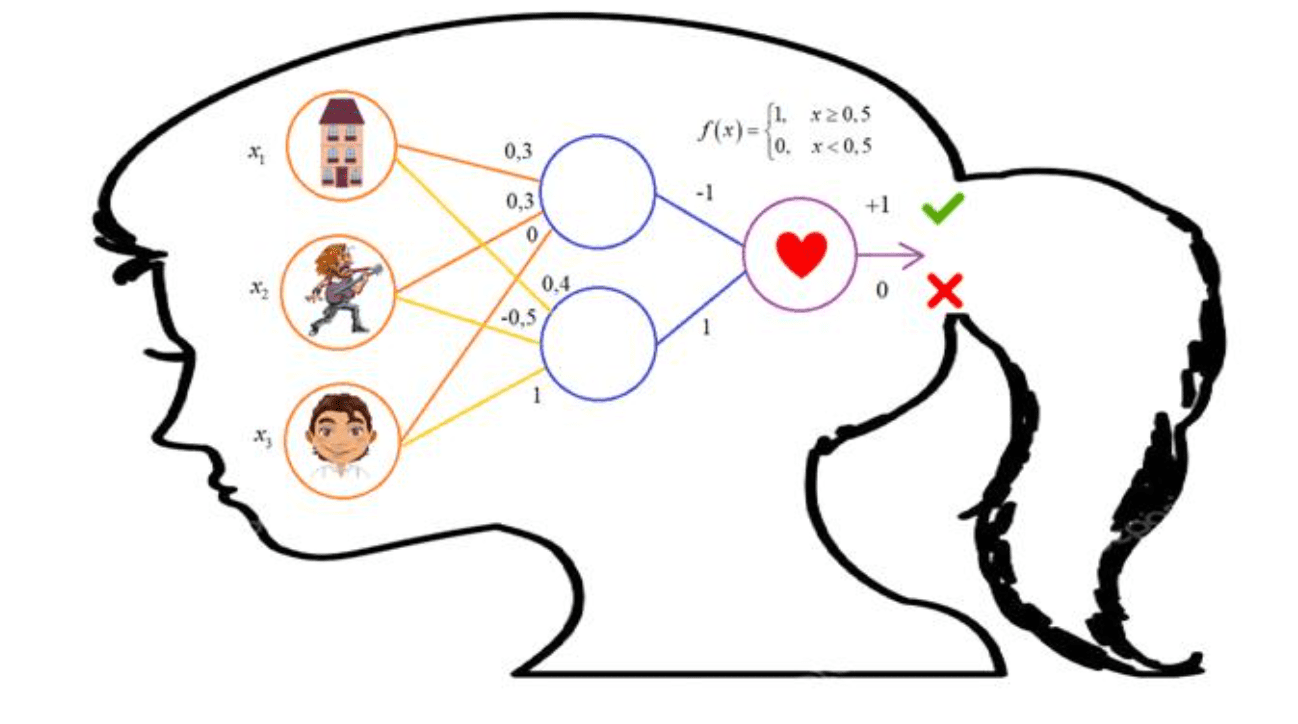

In [7]:
import numpy as np

def act(x):
    return 0 if x < 0.5 else 1

def go(house, rock, attr):
    x = np.array([house, rock, attr])
    w11 = [0.3, 0.3, 0]  # веса для первого нейрона скрытого слоя
    w12 = [0.4, -0.5, 1]  # веса для второго нейрона скрытого слоя
    weight1 = np.array([w11, w12])  # матрица 2x3
    weight2 = np.array([-1, 1])  # вектор 1x3

    sum_hidden = np.dot(weight1, x)  # вычисляем сумму на входах нейронов скрытого слоя
    print("Значения сумм на нейронах скрытого слоя: " + str(sum_hidden))

    out_hidden = np.array([act(x) for x in sum_hidden])
    print("Значения на выходах нейронов скрытого слоя: " + str(out_hidden))

    sum_end = np.dot(weight2, out_hidden)
    y = act(sum_end)

    print("Выходное значение НС: " + str(y))
    print(house, rock, attr)

    if y == 1:
      print("Ты мне нравишься")
    else:
      print("Созвонимся")

house, rock, attr = 1, 0, 1
go(house, rock, attr)

Значения сумм на нейронах скрытого слоя: [0.3 1.4]
Значения на выходах нейронов скрытого слоя: [0 1]
Выходное значение НС: 1
1 0 1
Ты мне нравишься


In [9]:
house, rock, attr = 1, 0, 0
go(house, rock, attr)

Значения сумм на нейронах скрытого слоя: [0.3 0.4]
Значения на выходах нейронов скрытого слоя: [0 0]
Выходное значение НС: 0
1 0 0
Созвонимся


In [10]:
house, rock, attr = 0, 1, 1
go(house, rock, attr)

Значения сумм на нейронах скрытого слоя: [0.3 0.5]
Значения на выходах нейронов скрытого слоя: [0 1]
Выходное значение НС: 1
0 1 1
Ты мне нравишься


## Пошаговый разбор

### Шаг 1: Инициализация входных данных
Входные параметры:
$$
x =
\begin{bmatrix}
house & rock & attr
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 1
\end{bmatrix}
$$

### Шаг 2: Определение весов для скрытого слоя
Веса для первого нейрона скрытого слоя:
$$
w_{11} =
\begin{bmatrix}
0.3 & 0.3 & 0
\end{bmatrix}
$$

Веса для второго нейрона скрытого слоя:
$$
w_{12} =
\begin{bmatrix}
0.4 & -0.5 & 1
\end{bmatrix}
$$

### Шаг 3: Формирование матрицы весов для скрытого слоя
Матрица весов для скрытого слоя:
$$
W_1 =
\begin{bmatrix}
w_{11} & w_{12}
\end{bmatrix}
=
\begin{bmatrix}
0.3 & 0.4 \\
0.3 & -0.5 \\
0 & 1
\end{bmatrix}
$$

### Шаг 4: Вычисление сумм на входах нейронов скрытого слоя
Суммы на входах нейронов скрытого слоя:
$$
sum\_hidden = W_1^T x =
\begin{bmatrix}
0.3 & 0.3 & 0 \\
0.4 & -0.5 & 1
\end{bmatrix}
\begin{bmatrix}
1 \\
0 \\
1
\end{bmatrix}
=
\begin{bmatrix}
(0.3 \cdot 1) + (0.3 \cdot 0) + (0 \cdot 1) \\
(0.4 \cdot 1) + (-0.5 \cdot 0) + (1 \cdot 1)
\end{bmatrix}
=
\begin{bmatrix}
0.3 \\
1.4
\end{bmatrix}
$$

### Шаг 5: Применение функции активации к выходам нейронов скрытого слоя
Функция активации:
$$
act(x) =
\begin{cases}
0 & \text{если } x < 0.5 \\
1 & \text{если } x \ge 0.5
\end{cases}
$$

Применение функции активации:
$$
out\_hidden =
\begin{bmatrix}
act(0.3) \\
act(1.4)
\end{bmatrix}
=
\begin{bmatrix}
0 \\
1
\end{bmatrix}
$$

### Шаг 6: Определение весов для выходного нейрона
Веса для выходного нейрона:
$$
w_2 =
\begin{bmatrix}
-1 & 1
\end{bmatrix}
$$

### Шаг 7: Вычисление суммы на выходном нейроне
Сумма на выходном нейроне:
$$
sum\_end = w_2 \cdot out\_hidden =
\begin{bmatrix}
-1 & 1
\end{bmatrix}
\begin{bmatrix}
0 \\
1
\end{bmatrix}
=
(-1 \cdot 0) + (1 \cdot 1) = 1
$$

### Шаг 8: Применение функции активации к выходу нейрона
Применение функции активации к выходу нейрона:
$$
y = act(sum\_end) = act(1) = 1
$$

### Заключение
На основании полученного значения \( y \):

Если \( y = 1 \), выводится сообщение "Ты мне нравишься".

Если \( y = 0 \), выводится сообщение "Созвонимся".

В данном случае, поскольку \( y = 1 \), результат будет "Ты мне нравишься".
